# word2vec model and sample queries

See Miklov et. al. 2013 for a description of the method 

01/08/2020: Initial version

In [1]:
# load required packages
import gensim
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load Google News word2vec model
google_model = gensim.models.Word2Vec.load_word2vec_format('../models/google-vectors.w2v'
                                                           ,binary=True)

In [43]:
# make vocab available
vocab = google_model.vocab

In [44]:
print("vocab:",len(vocab))

vocab: 71291


In [74]:
# simple queries first, single word
google_model.most_similar(["dartmouth","harvard","yale","cornell","princeton"],topn=20)

[('rutgers', 0.6384861469268799),
 ('cambridge', 0.592581033706665),
 ('tsinghua', 0.552392840385437),
 ('jmu', 0.5519542694091797),
 ('emory', 0.5408457517623901),
 ('university', 0.531731367111206),
 ('stanford', 0.5278353095054626),
 ('holyoke', 0.5208723545074463),
 ('mcgill', 0.5151753425598145),
 ('purdue', 0.5130349397659302),
 ('urbana', 0.5108714699745178),
 ('oxford', 0.5096290707588196),
 ('alumnus', 0.5070769786834717),
 ('brandeis', 0.5049766302108765),
 ('ucl', 0.4990570545196533),
 ('mit', 0.4979572594165802),
 ('undergraduate', 0.48931312561035156),
 ('georgetown', 0.4876157343387604),
 ('hofstra', 0.48556140065193176),
 ('fordham', 0.48413994908332825)]

In [60]:
# now we can add other terms to produce "better" queries
query = ["self","individual","sovereign","person"]
google_model.most_similar(query,topn=20)

[('individuals', 0.6033874154090881),
 ('oneself', 0.5217636823654175),
 ('virtue', 0.5150766968727112),
 ('or', 0.5132195353507996),
 ('obligation', 0.5017349720001221),
 ('entity', 0.4980880618095398),
 ('persons', 0.4924635887145996),
 ('any', 0.4768257737159729),
 ('desires', 0.4745156466960907),
 ('itself', 0.46881645917892456),
 ('merely', 0.46803826093673706),
 ('conscious', 0.46411627531051636),
 ('obedience', 0.4601413309574127),
 ('internalized', 0.4577147960662842),
 ('voluntary', 0.4528539776802063),
 ('necessarily', 0.4506300389766693),
 ('therefore', 0.45045652985572815),
 ('thus', 0.44733870029449463),
 ('submissive', 0.44692468643188477),
 ('believer', 0.4451025426387787)]

In [61]:
# extract data to plot from a query (uses above, from "query" variable)
# this is examining neighbors in semantic space 

response = google_model.most_similar(query,topn=20)

neighbor_list=list()
words=list()
for i in response:
    words.append(i[0])
    neighbor_list.append(google_model.wv[i[0]])

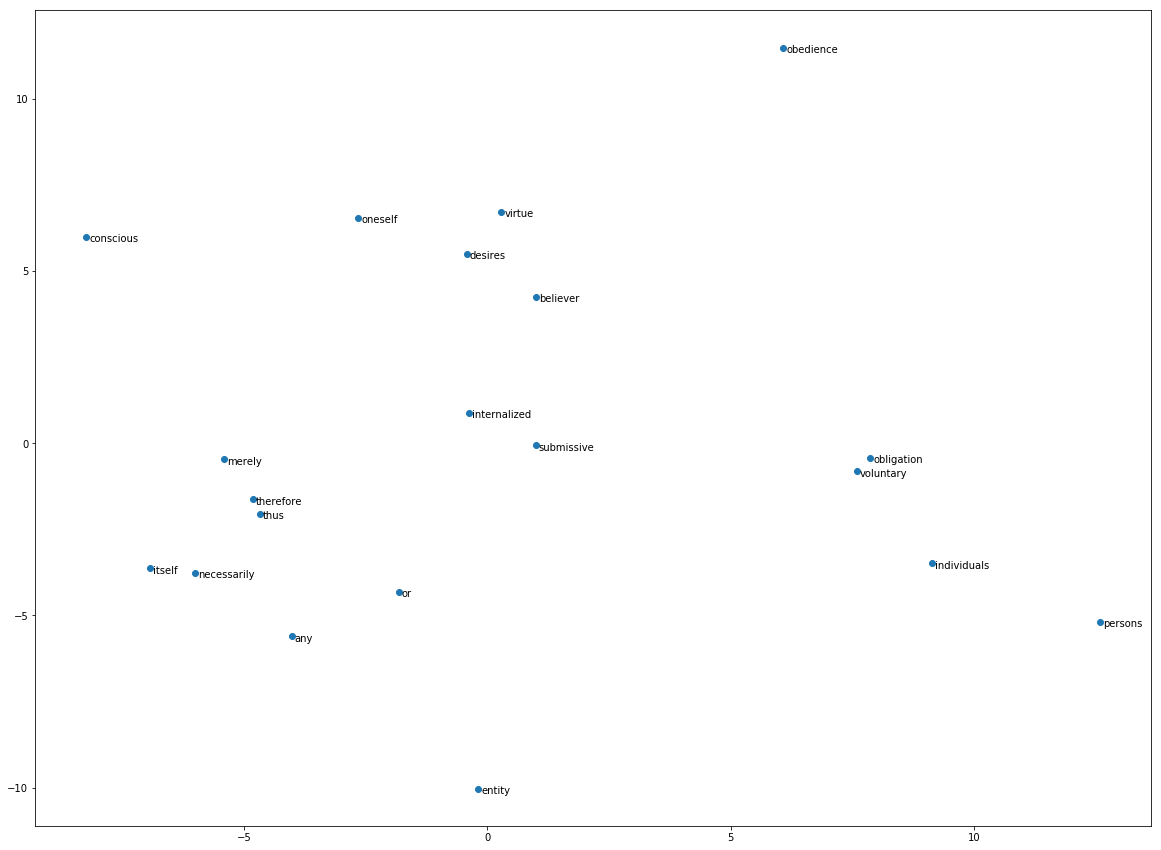

In [62]:
pca = PCA(n_components=2)
plot_data = pca.fit_transform(neighbor_list)

xs = plot_data[:, 0]
ys = plot_data[:, 1]
fig = plt.figure(figsize=(20, 15))
plt.clf()
plt.scatter(xs, ys, marker = 'o')
  
for i, w in enumerate(words):
    plt.annotate(w, xy = (xs[i], ys[i]), xytext = (3, 3),
    textcoords = 'offset points', ha = 'left', va = 'top')

In [63]:
# we can subtract certain words:
google_model.most_similar(positive=["self","individual","sovereign","person"], negative=['virtue'],topn=20)

[('individuals', 0.5669679641723633),
 ('persons', 0.4740105867385864),
 ('or', 0.47091275453567505),
 ('entity', 0.4618709087371826),
 ('any', 0.44074639678001404),
 ('obligation', 0.43617936968803406),
 ('monarch', 0.427677720785141),
 ('conscious', 0.41689759492874146),
 ('entities', 0.41149163246154785),
 ('itself', 0.4090583324432373),
 ('someone', 0.407029926776886),
 ('submissive', 0.4055374562740326),
 ('patient', 0.39555251598358154),
 ('discretion', 0.39523279666900635),
 ('merely', 0.3924708068370819),
 ('voluntary', 0.39078009128570557),
 ('specific', 0.3867788016796112),
 ('oneself', 0.3863934278488159),
 ('particular', 0.38516998291015625),
 ('necessarily', 0.3820194602012634)]

In [64]:
# this is the analogical reasoning task from the paper
google_model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.6040533185005188),
 ('daughter', 0.51621413230896),
 ('anjou', 0.5000643134117126),
 ('heiress', 0.49906477332115173),
 ('matilda', 0.495861679315567),
 ('montferrat', 0.4946897029876709),
 ('melisende', 0.4926695227622986),
 ('marries', 0.4898712635040283),
 ('isabella', 0.4857516884803772),
 ('consort', 0.48264074325561523)]

In [65]:
# access vectors directly
google_model["self"]

array([ 1.5266709e+00, -1.3248166e+00, -1.4959975e+00, -1.0202887e+00,
       -7.5709337e-01, -3.1080892e+00,  2.4989884e-01,  3.7053642e-01,
        1.6713779e+00,  1.4746551e-01,  4.7200194e-01,  9.4413841e-01,
        1.0351403e+00, -3.7790182e+00,  6.1911249e-01,  4.2035483e-02,
       -2.4451159e-01,  7.8951168e-01, -1.2539587e+00,  9.5210469e-01,
        2.4283682e-01, -3.9626428e-01, -4.3828931e-01, -6.6674817e-01,
       -1.3539171e+00, -1.4117153e-01, -1.3341666e+00, -5.9106159e-01,
        2.5438063e+00, -1.4613646e+00,  4.2113797e-03,  1.8350695e-01,
       -2.4154227e+00, -3.2583460e-01, -1.2615119e+00,  8.1890747e-02,
        1.1472880e+00, -2.9135606e+00, -7.1966451e-01, -2.3077657e+00,
        1.7080457e+00,  2.4316745e+00, -1.2631930e+00,  1.6113079e+00,
       -1.4936490e+00,  9.1701365e-01,  1.0868908e+00, -3.8439876e-01,
        2.5333471e+00, -2.4342711e+00,  1.0319480e+00, -1.7265165e+00,
       -4.2302361e+00, -1.4137658e+00,  6.6108036e-01, -1.2456709e+00,
      

In [80]:
help(gensim.models.Word2Vec.wmdistance)

Help on function wmdistance in module gensim.models.word2vec:

wmdistance(self, document1, document2)

